In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
CONDITIONS = ['0h', '5h', '10h', '15h', '20h', '24h']

cost_data = {}
bin_data = {}

for condition in CONDITIONS:
    file = pd.read_csv('../data/postprocessing/230822_compare_forced_bhkw_operation/output_time_series_' + condition + '.csv')
    gas_costs = file['bhkw_gas'] * file['gas_price']
    power_costs = file['net_power'].where(file['net_power'] <= 0, 0) * file['power_price']
    power_revenue = file['net_power'].where(file['net_power'] >= 0, 0) * file['power_price']
    
    costs = gas_costs - power_costs - power_revenue

    cost_data[condition] = costs
    bin_data[condition] = file['bhkw_bin'].sum()

print(bin_data)

{'0h': 6.0, '5h': 6.0, '10h': 10.0, '15h': 15.0, '20h': 20.0, '24h': 24.0}


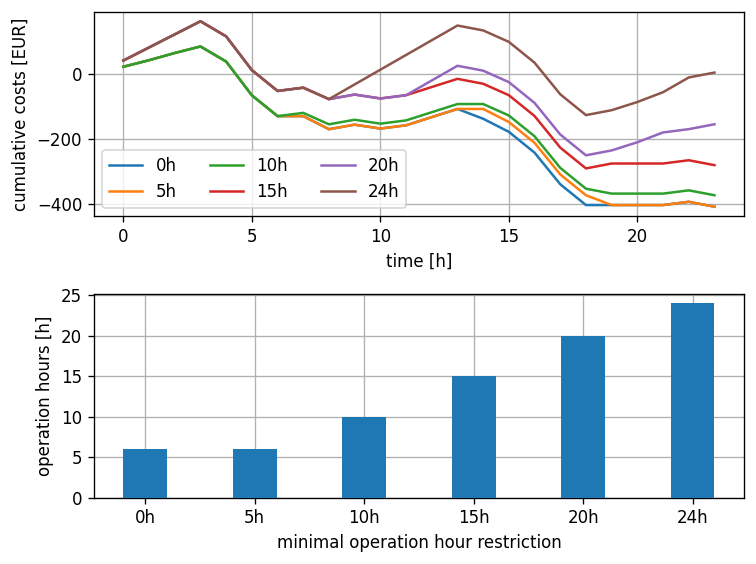

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=120)

ax1.plot(pd.DataFrame(cost_data).cumsum(), label=cost_data.keys())
ax1.set_ylabel('cumulative costs [EUR]')
ax1.set_xlabel('time [h]')
ax1.legend(ncol=3)
ax1.grid()

ax2.bar(bin_data.keys(), bin_data.values(), width=0.4, zorder=3)
ax2.set_ylabel('operation hours [h]')
ax2.set_xlabel('minimal operation hour restriction')
ax2.grid(zorder=0)

fig.tight_layout()
